<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

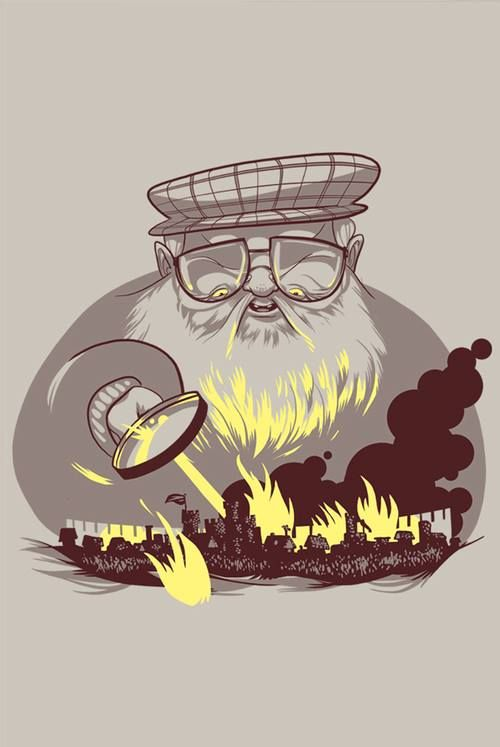

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [48]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [50]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [52]:
# для тех, у кого не указан title, запишем, что у них нет титула
# то же самое сделаем для heir, house, spouse
data['title'].fillna('No title', inplace=True)
data['heir'].fillna('No heir', inplace=True)
data['house'].fillna('No house', inplace=True)
data['spouse'].fillna('No spouse', inplace=True)

# для culture, mother, father запишем, что нет информации
data['culture'].fillna('No info', inplace=True)
data['mother'].fillna('No info', inplace=True)
data['father'].fillna('No info', inplace=True)

# пропущенные значения в столбцах isAlive... заполним нулями
# тогда модель не будет учитывать этот признак (если он равен 0), что логично
data['isAliveFather'].fillna(0, inplace=True)
data['isAliveMother'].fillna(0, inplace=True)
data['isAliveHeir'].fillna(0, inplace=True)
data['isAliveSpouse'].fillna(0, inplace=True)

In [53]:
# пропущенные значения остались только в столбцах age и dateOfBirth
# dateOfBirth удалим, так как он дублирует age
# age заполним средним возрастом выживших и умерших соответственно
mean_alive = round(data[data['isAlive'] == 1]['age'].mean())
mean_dead = round(data[data['isAlive'] == 0]['age'].mean())

data.loc[(data['isAlive'] == 1) & (data['age'].isna()), 'age'] = mean_alive
data.loc[(data['isAlive'] == 0) & (data['age'].isna()), 'age'] = mean_dead

data.drop(columns='dateOfBirth', inplace=True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [54]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x >= 0.5 else 0)

In [55]:
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [56]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [57]:
# переделаем словарь выше
# сделаем значения списков ключами, а ключи значениями словаря
cult_reversed = {}
for key, values in cult.items():
    for value in values:
        cult_reversed[value] = key

In [58]:
data['culture'] = data['culture'].apply(lambda x: cult_reversed[x.lower(
)] if x.lower() in cult_reversed.keys() else x.capitalize())

In [59]:
# создадим новые признаки motherInfo, fatherInfo, heirInfo, spouseInfo
# на основе mother, father, heir, spouse
# 1 - указано имя, 0 - нет информации
data['motherInfo'] = data['mother'].apply(lambda x: 0 if x == 'No info' else 1)
data['fatherInfo'] = data['father'].apply(lambda x: 0 if x == 'No info' else 1)
data['heirInfo'] = data['heir'].apply(lambda x: 0 if x == 'No info' else 1)
data['spouseInfo'] = data['spouse'].apply(lambda x: 0 if x == 'No info' else 1)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [60]:
# удалим столбцы, из которых мы вытащили и преобразовали информацию, и столбец name 
data.drop(columns=['name', 'mother', 'father', 'heir', 'spouse', 'popularity', 'numDeadRelations'], inplace = True)

In [61]:
data.head()

,title,male,culture,house,book1,book2,book3,book4,book5,isAliveMother,...,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,motherInfo,fatherInfo,heirInfo,spouseInfo
S.No,,,,,,,,,,,,,,,,,,,,,
1,No title,1,No info,No house,0,0,0,0,0,1.0,...,0,0,47.0,0,1,1,1,1,1,1
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,0.0,...,1,1,97.0,1,1,1,0,0,1,1
3,Ser,1,No info,House Swyft,0,0,0,1,0,0.0,...,0,1,30.0,1,0,0,0,0,1,1
4,Queen,0,No info,House Arryn,0,0,0,0,0,0.0,...,1,1,23.0,0,0,0,0,0,1,1
5,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,0.0,...,1,1,29.0,1,0,0,0,0,1,1


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

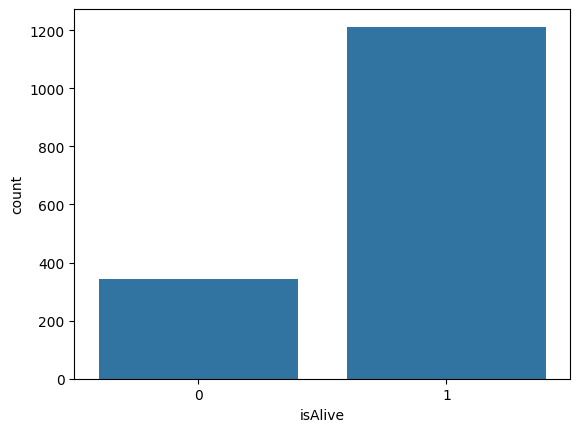

In [62]:
# Целевая переменная является категориальной (2 класса: 1 - выжил, 0 - умер).
# Соответственно мы решаем задачу бинарной классификации
sns.countplot(x='isAlive', data=data)

plt.show()
# Как мы видим, датасет не является сбалансированным по классам

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   object 
 3   house              1557 non-null   object 
 4   book1              1557 non-null   int64  
 5   book2              1557 non-null   int64  
 6   book3              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   book5              1557 non-null   int64  
 9   isAliveMother      1557 non-null   float64
 10  isAliveFather      1557 non-null   float64
 11  isAliveHeir        1557 non-null   float64
 12  isAliveSpouse      1557 non-null   float64
 13  isMarried          1557 non-null   int64  
 14  isNoble            1557 non-null   int64  
 15  age                1557 non-null   float64
 16  isAlive            1557 non-n

In [64]:
# оставшиеся категориальные признаки декодируем с помощью Mean Target Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

cols = ['title', 'culture', 'house']
for col in cols:
    data[col] = encoder.fit_transform(data[col])

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

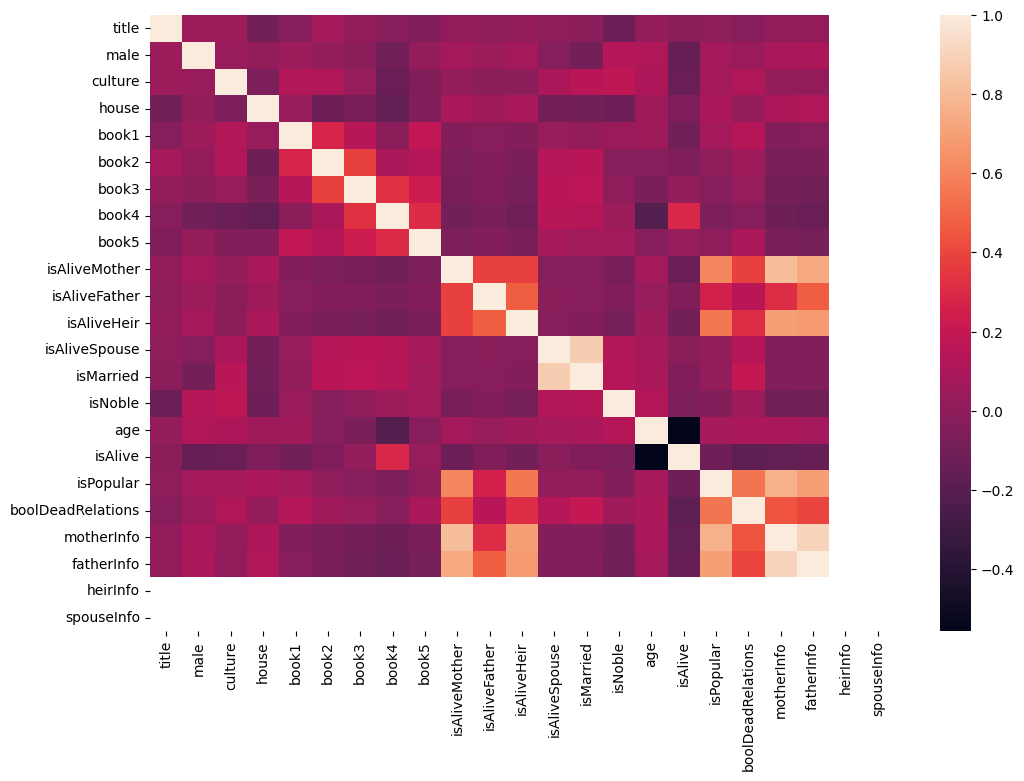

In [65]:
corrmat = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corrmat)
plt.show()
# видно, что очень высокая отрицательная корреляция целевой переменной с возрастом
# пол и наличие информации о ближайших родственниках также влияют на выживаемость героя
# заметим, что появление в каждой следующей книги все больше положительно коррелирует с целевой переменной

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [66]:
X = data.drop(columns='isAlive')
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [69]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [70]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [71]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

c:\Users\Dmitry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [72]:
models = {
  "Logistic Regression": LogisticRegression(C=1),
  "AdaBoostClassifier": AdaBoostClassifier(n_estimators=100, random_state=42),
  "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
  "GaussianProcessClassifier": GaussianProcessClassifier(random_state=42),
  "GaussianNB": GaussianNB(),
  "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
  "SVC": SVC(kernel='linear'),
  "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42)
}

predictions = {}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  predictions[model_name] = y_pred

c:\Users\Dmitry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [73]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [74]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8910


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [75]:
for model_name, prediction in predictions.items():
    accuracy = accuracy_score(y_test, prediction)
    print(f"Accuracy of {model_name}: {accuracy:.4f}") 

Accuracy of Logistic Regression: 0.8910
Accuracy of AdaBoostClassifier: 0.9808
Accuracy of RandomForestClassifier: 0.9583
Accuracy of GaussianProcessClassifier: 0.9135
Accuracy of GaussianNB: 0.7692
Accuracy of KNeighborsClassifier: 0.8910
Accuracy of SVC: 0.9391
Accuracy of DecisionTreeClassifier: 0.9647


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [76]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [77]:
test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [78]:
test['title'].fillna('No title', inplace=True)
test['heir'].fillna('No heir', inplace=True)
test['house'].fillna('No house', inplace=True)
test['spouse'].fillna('No spouse', inplace=True)

test['culture'].fillna('No info', inplace=True)
test['mother'].fillna('No info', inplace=True)
test['father'].fillna('No info', inplace=True)

test['isAliveFather'].fillna(0, inplace=True)
test['isAliveMother'].fillna(0, inplace=True)
test['isAliveHeir'].fillna(0, inplace=True)
test['isAliveSpouse'].fillna(0, inplace=True)

In [79]:
age = round((mean_alive + mean_dead) / 2)

test['age'] = mean_alive

test.drop(columns='dateOfBirth', inplace=True)

In [80]:
test['isPopular'] = test['popularity'].apply(lambda x: 1 if x >= 0.5 else 0)

In [81]:
test['boolDeadRelations'] = test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [82]:
test['culture'] = test['culture'].apply(lambda x: cult_reversed[x.lower(
)] if x.lower() in cult_reversed.keys() else x.capitalize())

In [83]:
test['motherInfo'] = test['mother'].apply(lambda x: 0 if x == 'No info' else 1)
test['fatherInfo'] = test['father'].apply(lambda x: 0 if x == 'No info' else 1)
test['heirInfo'] = test['heir'].apply(lambda x: 0 if x == 'No info' else 1)
test['spouseInfo'] = test['spouse'].apply(lambda x: 0 if x == 'No info' else 1)

In [84]:
test.drop(columns=['name', 'mother', 'father', 'heir', 'spouse', 'popularity', 'numDeadRelations'], inplace = True)

In [85]:
cols = ['title', 'culture', 'house']
for col in cols:
    test[col] = encoder.fit_transform(test[col])

In [86]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [99]:
submission['isAlive'] = models['AdaBoostClassifier'].predict(test)

Как сохранить измененный Pandas DataFrame в csv файл:

In [100]:
submission.to_csv("/content/new_submission.csv", index=False)